# Entry 25 notebook - figuring out `openml`

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import openml

### `fetch_openml`

In [16]:
from sklearn.datasets import fetch_openml

titanic = fetch_openml('titanic', version=1, as_frame=True)

The `fetch_openml` from `sklearn.datasets` was throwing errors and whining about not supporting strings for the dataset name. I got it to download a version of the titanic dataset, but it was the wrong version. Of course, now it works.

In [17]:
titanic.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [18]:
titanic.frame.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [19]:
titanic.data.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


### `openml` package

Anyhow, `openml` is another option. From this package, I can list out all the available datasets, as well as quite a few attributes of each of them.

In [20]:
openml_opts = openml.datasets.list_datasets(output_format='dataframe')
openml_opts[openml_opts['name'].str.startswith('T')].sort_values('name')

,did,name,version,uploader,status,format,MajorityClassSize,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures
41170,41170,TUPRASBoilerData,1,6363,active,ARFF,NaN,44643.0,NaN,NaN,8.0,44643.0,44643.0,44643.0,7.0,1.0
41952,41952,TaskCreationTestDataset,1,1159,active,arff,NaN,3.0,NaN,NaN,5.0,150.0,0.0,0.0,4.0,1.0
41953,41953,TaskCreationTestDataset,2,1159,active,arff,NaN,3.0,NaN,NaN,5.0,150.0,0.0,0.0,4.0,1.0
41961,41961,TaskCreationTestDataset,3,1159,active,arff,NaN,3.0,NaN,NaN,5.0,150.0,0.0,0.0,4.0,1.0
41962,41962,TaskCreationTestDataset,4,1159,active,arff,NaN,3.0,NaN,NaN,5.0,150.0,0.0,0.0,4.0,1.0
42259,42259,Test,4,10831,active,ARFF,NaN,NaN,NaN,NaN,8.0,6330.0,0.0,0.0,7.0,1.0
40704,40704,Titanic,2,869,active,ARFF,1490.0,2.0,711.0,2.0,4.0,2201.0,0.0,0.0,3.0,1.0
40945,40945,Titanic,1,2,active,ARFF,809.0,3.0,500.0,2.0,14.0,1309.0,1309.0,3855.0,6.0,3.0
41265,41265,Titanic,4,5243,active,ARFF,NaN,NaN,NaN,0.0,8.0,1307.0,0.0,0.0,8.0,0.0
42132,42132,Traffic_violations,4,5332,active,arff,789812.0,33.0,899.0,4.0,43.0,1578154.0,1532400.0,8006541.0,3.0,5.0


Due to the kind of data I use at work, I'm interested in binary classification problems where the data is imbalanced. I can filter the available datasets to just the kinds I'm intersted in.

In [22]:
binary_ds = openml_opts[openml_opts['NumberOfClasses']==2]
binary_ds.loc[binary_ds['MinorityClassSize']/binary_ds['MajorityClassSize'] < 0.07, 'name'].unique().tolist()

['sick',
 'BNG(sick,nominal,1000000)',
 '20_newsgroups.drift',
 'mammography',
 'oil_spill',
 'yeast_ml8',
 'arsenic-male-bladder',
 'arsenic-female-lung',
 'arsenic-male-lung',
 'letter',
 'analcatdata_challenger',
 'ipums_la_99-small',
 'hiva_agnostic',
 'sylva_prior',
 'kc1-top5',
 'mc1',
 'pc2',
 'KDDCup09_appetency',
 'OVA_Omentum',
 'OVA_Endometrium',
 'OVA_Prostate',
 'BNG(solar-flare)',
 'Click_prediction_small',
 'PieChart2',
 'ozone-level-8hr',
 'creditcard',
 'Amazon_employee_access',
 'CreditCardSubset',
 'birds',
 'enron',
 'langLog',
 'slashdot',
 'dis',
 'Satellite',
 'Speech',
 'wilt',
 'APSFailure',
 'Sick_numeric',
 'porto-seguro',
 'Asteroid_Dataset']

In [50]:
titanic = openml.datasets.get_dataset(40945)

In [57]:
titanic

OpenML Dataset
Name..........: Titanic
Version.......: 1
Format........: ARFF
Upload Date...: 2017-10-16 01:17:36
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/16826755/Titanic.arff
OpenML URL....: https://www.openml.org/d/40945
# of features.: 14
# of instances: 1309

In [71]:
raw_df = titanic.get_data()[0]

In [75]:
raw_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
target = cancer.target

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df, target, train_size=0.8, random_state=12)
pipe = make_pipeline(SimpleImputer(strategy='median'), StandardScaler(), LogisticRegression(solver='lbfgs'))
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.9736842105263158

In [ ]:
cross_validate(pipe, X_train, y_train, cv=10, scoring=['precision', 'average_precision', 'recall',
                                                       'f1', 'neg_log_loss', 'neg_brier_score'])

In [20]:
y_scores =  cross_val_predict(pipe, X_train, y_train, cv=10, method='decision_function')

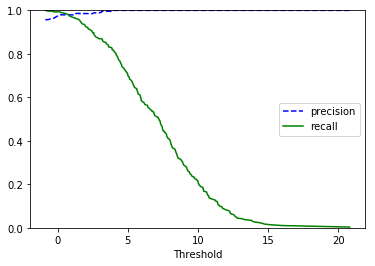

In [23]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

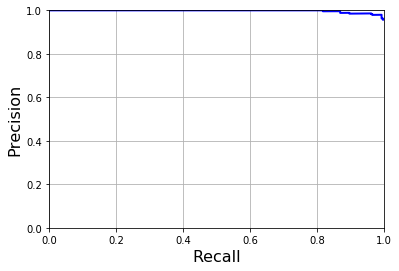

In [24]:
plot_precision_vs_recall(precisions, recalls)